In [2]:
import sympy
import numpy as np
from qiskit import transpile, QuantumCircuit
from qiskit.circuit import Instruction, Gate, ControlledGate
from qiskit.extensions.unitary import _compute_control_matrix
from scipy.linalg import expm
import matplotlib.pyplot as plt
from sympy import Symbol, Matrix, pi, simplify
from sympy.physics.quantum import TensorProduct

In [3]:
def tensor(self, other):
    return TensorProduct(self, other)

Matrix.tensor = tensor
Matrix.kron = tensor

In [4]:
theta = Symbol('θ')
phi = Symbol('φ')
lam = Symbol('λ')

In [5]:
def is_clifford(circuit):
    if isinstance(circuit, (Gate, ControlledGate, Instruction)):
        transformed = QuantumCircuit(circuit.num_qubits)
        transformed.append(circuit, list(range(circuit.num_qubits)))
        circuit = transformed
    
    try:
        transpile(circuit, basis_gates=['i', 'x', 'y', 'z', 'h', 's', 'sdg', 'cx'])
        return True
    except:
        return False

In [12]:
CX = Matrix([[1, 0, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]])

CX_top = Matrix([[1, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 0]])
def RX(theta):
    c, js = sympy.cos(theta / 2), 1j * sympy.sin(theta / 2)
    return Matrix([[c, -js], 
                   [-js, c]])

def RY(theta): 
    c, s = sympy.cos(theta / 2), sympy.sin(theta / 2)
    return Matrix([[c, -s],
                   [s, c]])

def CRX(theta, top=False):
    c, js = sympy.cos(theta / 2), 1j * sympy.sin(theta / 2)
    if top:
        return Matrix([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, c, -js],
                       [0, 0, -js, c]])
    return Matrix([[1, 0, 0, 0],
                   [0, c, 0, -js],
                   [0, 0, 1, 0],
                   [0, -js, 0, c]])

def CRZ(theta, top=False, qiskit=False):
    if qiskit:
        a, b = 1, sympy.exp(theta)
    else:
        a, b = sympy.exp(-theta/2), sympy.exp(theta/2)
    if top:
        return Matrix([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, a, 0],
                       [0, 0, 0, b]])
    return Matrix([[1, 0, 0, 0],
                   [0, a, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, b]])

def RZ(theta):
    return Matrix([[sympy.exp(-1j * theta / 2), 0],
                   [0, sympy.exp(1j * theta / 2)]])

def U1(theta):
    return Matrix([[1, 0],
                   [0, sympy.exp(1j * theta)]])

def CU1(theta):
    return Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, sympy.exp(1j * theta)]])

SWAP = Matrix([[1, 0, 0, 0],
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

I = Matrix([[1, 0],
            [0, 1]])

X = Matrix([[0, 1],
            [1, 0]])

Y = Matrix([[0, -1j],
            [1j, 0]])

Z = Matrix([[1, 0],
            [0, -1]])

H = Matrix([[1, 1],
            [1, -1]]) / sympy.sqrt(2)

S = Matrix([[1, 0],
            [0, 1j]])

Sdg = Matrix([[1, 0],
            [0, -1j]])

T = U1(pi/4)

Sdg = Matrix([[1, 0],
              [0, -1j]])

SX = Matrix([[1 + 1j, 1 - 1j], 
             [1 - 1j, 1 + 1j]]) / 2

SXdg = Matrix([[1 - 1j, 1 + 1j], 
               [1 + 1j, 1 - 1j]]) / 2

def U2(phi, lam):
    return Matrix([[1, -sympy.exp(1j*lam)], 
                   [sympy.exp(1j*phi), sympy.exp(1j*(lam + phi))]]) / sympy.sqrt(2)

def U3(theta, phi, lam):
    c, s = sympy.cos(theta / 2), sympy.sin(theta / 2)
    return Matrix([[c, -sympy.exp(1j * lam) * s],
                   [sympy.exp(1j * phi) * s, sympy.exp(1j * (phi + lam)) * c]])

def RXX(theta):
    return sympy.exp(-1j * theta * X.tensor(X))

def RYY(theta):
    return sympy.exp(-1j * theta * Y.tensor(Y))

In [15]:
simplify(SXdg * SX)

Matrix([
[1.0,   0],
[  0, 1.0]])

In [20]:
np.abs(SX * Matrix([0, 1])) ** 2

array([[0.500000000000000],
       [0.500000000000000]], dtype=object)

In [21]:
np.abs(H * Matrix([0, 1])

array([[1/2],
       [1/2]], dtype=object)

In [58]:
# theta = 0.2
# phi = 0.4
# lam = 0.4
theta = Symbol('θ')
phi = Symbol('φ')
lam = Symbol('λ')

In [77]:
simplify((1 - 1j)**2)

-2.0*I

In [84]:
simplify(simplify((U1(lam) * SX * U1(theta + sympy.pi) * SX * U1(phi + sympy.pi))))

Matrix([
[                                0.5*I*(1 - exp(1.0*I*(θ + pi))),             0.25*(1 - I)*(I*exp(1.0*I*(θ + pi)) + 1 + I)*exp(1.0*I*(φ + pi))],
[0.25*(1 - I)*((1 + I)*exp(1.0*I*λ) + I*exp(1.0*I*(θ + λ + pi))), 0.25*((1 - I)**2*exp(1.0*I*λ) - exp(1.0*I*(θ + λ + pi)))*exp(1.0*I*(φ + pi))]])

In [83]:
simplify(simplify((U1(phi) * SX * U1(theta) * SXdg * U1(lam) * sympy.exp(-0.5j * theta))))

Matrix([
[                                                             1.0*cos(0.5*θ),                                   0.5*I*(1 - exp(1.0*I*θ))*exp(-I*(0.5*θ - 1.0*λ))],
[0.25*((1 - I)**2*exp(1.0*I*φ) + I*(1 + I)*exp(1.0*I*(θ + φ)))*exp(-0.5*I*θ), 0.25*(1 - I)*((1 + I)*exp(1.0*I*φ) + I*exp(1.0*I*(θ + φ)))*exp(-I*(0.5*θ - 1.0*λ))]])

In [42]:
U3(theta, phi, lam).evalf()

Matrix([
[                        0.995004165278026, -0.0919526659714317 - 0.0388769636176167*I],
[0.0919526659714317 + 0.0388769636176167*I,    0.693226077777576 + 0.713772298432587*I]])

In [22]:
th = 2
RY(th)

Matrix([
[ 0.54030230586814, -0.841470984807897],
[0.841470984807897,   0.54030230586814]])

In [24]:
(H * RY(th) * Matrix([1, 0])).evalf()

Matrix([
[ 0.977061263899476],
[-0.212958415159296]])

In [14]:
def is_unitary(mat):
    return mat * mat.H == I

In [21]:
U = sympy.exp(1j * Y)
print(is_unitary(U))
U

True


Matrix([
[  0.54030230586814, 0.841470984807897],
[-0.841470984807897,  0.54030230586814]])

In [22]:
U = sympy.exp(1j * (X * Y))
print(is_unitary(U))
U

False


Matrix([
[0.367879441171442,                0],
[                0, 2.71828182845905]])

In [24]:
is_unitary(sympy.exp(Z))

False

In [25]:
Y * X

Matrix([
[-1.0*I,     0],
[     0, 1.0*I]])

In [25]:
U1(theta/2).tensor(I) * CX_top * U1(-theta).tensor(I) * CX_top * I.tensor(U1(theta/2)) 

Matrix([
[1,            0,             0, 0],
[0, exp(0.5*I*θ),             0, 0],
[0,            0, exp(-0.5*I*θ), 0],
[0,            0,             0, 1]])

In [14]:
I.tensor(U1(theta/2)) * CX * I.tensor(U1(-theta/2)) * CX * I.tensor(U1(theta/2)) 

Matrix([
[1,            0, 0,            0],
[0, exp(0.5*I*θ), 0,            0],
[0,            0, 1,            0],
[0,            0, 0, exp(0.5*I*θ)]])

In [6]:
RZ(theta)

Matrix([
[exp(-0.5*I*θ),            0],
[            0, exp(0.5*I*θ)]])

In [35]:
simplify(SXdg * RY(-theta) * SX)

Matrix([
[1.0*exp(-I*θ/2),              0],
[              0, 1.0*exp(I*θ/2)]])

In [31]:
(RX(-pi/2)* sympy.exp(-1j * pi / 4)).evalf()

Matrix([
[0.5 - 0.5*I, 0.5 + 0.5*I],
[0.5 + 0.5*I, 0.5 - 0.5*I]])

In [24]:
sympy.exp(1j * pi / 4).evalf()

0.707106781186548 + 0.707106781186548*I

In [25]:
simplify(Sdg * H * Sdg * sympy.exp(1j * pi / 4)).evalf()

Matrix([
[0.5 + 0.5*I, 0.5 - 0.5*I],
[0.5 - 0.5*I, 0.5 + 0.5*I]])

In [27]:
simplify(S * H * S * sympy.exp(-1j * pi / 4)).evalf()

Matrix([
[0.5 - 0.5*I, 0.5 + 0.5*I],
[0.5 + 0.5*I, 0.5 - 0.5*I]])

In [209]:
simplify(simplify(RX(-pi/2) * RY(theta) * RX(pi/2)))

Matrix([
[1.0*exp(I*θ/2),               0],
[             0, 1.0*exp(-I*θ/2)]])

In [160]:
#theta = [0.814824, 0.275932, 0.627729, 0.670661, 0.596198]
theta = [Symbol('p{}'.format(i), real=True) for i in range(10)]

op = Z.tensor(Y) + 3 * X.tensor(X) + Z.tensor(I) + I.tensor(Z) + X.tensor(I)

wf = Matrix([1, 0, 0, 0])
# wf = H.tensor(H) * wf
# wf = simplify(RY(theta[0]).tensor(RY(theta[1])) * wf)
# wf = simplify(RZ(theta[2]).tensor(RZ(theta[3])) * wf)
# wf = simplify(CX * wf)
wf = simplify(CU1(theta[4]) * wf)


state = wf.conjugate().T * simplify(op * wf)

In [159]:
simplify(state)

Matrix([[0]])

In [192]:
theta = [Symbol('p{}'.format(i), real=True) for i in range(10)]
values = [0.275932, 0.814824, 0.670661, 0.627729, 0.596198]

op = Z.tensor(Y) + 3 * X.tensor(X) + Z.tensor(I) + I.tensor(Z) + X.tensor(I)
# op = H.tensor(H)

wf = Matrix([0, 0, 0, 1])
wf = H.tensor(H) * wf
wf = RY(theta[0]).tensor(RY(theta[1])) * wf
wf = RZ(theta[2]).tensor(RZ(theta[3])) * wf
wf = CX * wf
wf = CRX(theta[4], top=False) * wf

state = wf.conjugate().T * op * wf

In [187]:
# f = simplify(state)
# f

In [188]:
# sympy.diff(f, theta[0])

In [193]:
[sympy.re(sympy.diff(state, t).subs(dict(zip(theta, values))).evalf()) for t in theta[:5]]

[Matrix([[1.68339048682981]]),
 Matrix([[0.456672647209959]]),
 Matrix([[1.44018773028081]]),
 Matrix([[-1.15284291114189]]),
 Matrix([[0.635497351835057]])]

In [96]:
simplify(simplify(RZ(-pi/2) * H * RZ(-pi/2) * (1 - 1j) / sympy.sqrt(2)))

Matrix([
[0.5 + 0.5*I, 0.5 - 0.5*I],
[0.5 - 0.5*I, 0.5 + 0.5*I]])

In [88]:
SX

Matrix([
[  1/2 + I/2, 0.5 - 0.5*I],
[0.5 - 0.5*I,   1/2 + I/2]])

In [83]:
U1(pi/2)

Matrix([
[1,             0],
[0, exp(0.5*I*pi)]])

In [42]:
U2(theta, phi)

Matrix([
[             sqrt(2)/2,      -sqrt(2)*exp(1.0*I*φ)/2],
[sqrt(2)*exp(1.0*I*θ)/2, sqrt(2)*exp(1.0*I*(θ + φ))/2]])

In [48]:
U1(theta) * H * U1(phi) * Z

Matrix([
[             sqrt(2)/2,             -sqrt(2)*exp(1.0*I*φ)/2],
[sqrt(2)*exp(1.0*I*θ)/2, sqrt(2)*exp(1.0*I*θ)*exp(1.0*I*φ)/2]])

In [61]:
simplify(U1(phi) * SX * U1(theta))

Matrix([
[sqrt(2)*(1.0*(1 - I)*exp(1.0*I*φ) + 1 + I)/4, sqrt(2)*((1 + I)*exp(1.0*I*φ) + 1.0 - 1.0*I)*exp(1.0*I*θ)/4],
[ sqrt(2)*((-1.0 + I)*exp(1.0*I*φ) + 1 + I)/4,    sqrt(2)*(-(1 + I)*exp(1.0*I*φ) + 1.0 - I)*exp(1.0*I*θ)/4]])

In [ ]:
(X.tensor(I) )

In [ ]:
SX

In [72]:
simplify(RX(pi/2)

Matrix([
[     sqrt(2)/2, -0.5*sqrt(2)*I],
[-0.5*sqrt(2)*I,      sqrt(2)/2]])

In [49]:
SX = simplify((X)**(1/2))

In [31]:
U = H * U1(pi/8) * U1(pi/8) * U1(pi/8) * U1(pi/8) * H

In [33]:
U = H * U1(pi/2) * H

In [81]:
0.5 * (1 - 1j) * np.exp(-0.25j * np.pi)

(5.551115123125783e-17-0.7071067811865475j)

In [82]:
-0.5j * np.sqrt(2)

-0.7071067811865476j

Matrix([
[     sqrt(2)/2, -0.5*sqrt(2)*I],
[-0.5*sqrt(2)*I,      sqrt(2)/2]])

In [76]:
simplify(SX * sympy.exp(-1j * pi / 4))

Matrix([
[  (1 + I)*exp(-0.25*I*pi)/2, 0.5*(1 - I)*exp(-0.25*I*pi)],
[0.5*(1 - I)*exp(-0.25*I*pi),   (1 + I)*exp(-0.25*I*pi)/2]])

In [34]:
simplify(U)

Matrix([
[1/2 + I/2, 1/2 - I/2],
[1/2 - I/2, 1/2 + I/2]])

In [70]:
simplify(RX(pi/2) * (1 + 1j) / sympy.sqrt(2))

Matrix([
[0.5 + 0.5*I, 0.5 - 0.5*I],
[0.5 - 0.5*I, 0.5 + 0.5*I]])

In [103]:
RX(pi/4) * sympy.exp(-pi/8)

Matrix([
[       sqrt(sqrt(2)/4 + 1/2)*exp(-pi/8), -1.0*I*sqrt(1/2 - sqrt(2)/4)*exp(-pi/8)],
[-1.0*I*sqrt(1/2 - sqrt(2)/4)*exp(-pi/8),        sqrt(sqrt(2)/4 + 1/2)*exp(-pi/8)]])

In [242]:
theta = 1 

In [243]:
U = H * U1(theta) * U1(theta) * U1(theta) * U1(theta) * H

In [244]:
simplify(U)

Matrix([
[0.173178189568194 - 0.378401247653964*I, 0.826821810431806 + 0.378401247653964*I],
[0.826821810431806 + 0.378401247653964*I, 0.173178189568194 - 0.378401247653964*I]])

In [245]:
X**(4 / np.pi)

Matrix([
[0.173178189568194 - 0.378401247653964*I, 0.826821810431806 + 0.378401247653964*I],
[0.826821810431806 + 0.378401247653964*I, 0.173178189568194 - 0.378401247653964*I]])

In [222]:
X**(4/pi) == simplify(U)

False

(0.880689636890038+0.47369374439028955j)

In [139]:
U = H * U1(-pi/8) * U1(-pi/8) * U1(-pi/8) * U1(-pi/8) * H

In [140]:
simplify(U)

Matrix([
[1/2 - I/2, 1/2 + I/2],
[1/2 + I/2, 1/2 - I/2]])

In [119]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import C3SqrtXGate
from qiskit.quantum_info import Operator
from qiskit.quantum_info.operators.predicates import matrix_equal

In [108]:
sqrt = QuantumCircuit(4)
sqrt.append(C3SqrtXGate(), [3, 2, 1, 0])
sqrt = Operator(sqrt)

In [124]:
simplify(sqrt_x.H * sqrt_x)

Matrix([
[1.0,   0],
[  0, 1.0]])

In [141]:
sqrt_x = np.array([[0.5 - 0.5j, 0.5 + 0.5j], [0.5 + 0.5j, 0.5 - 0.5j]])
c3sqrtx = np.eye(2**4, dtype=complex)
c3sqrtx[-2:, -2:] = sqrt_x

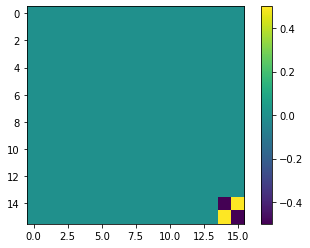

In [142]:
plt.imshow(c3sqrtx.imag)
plt.colorbar()
plt.show()

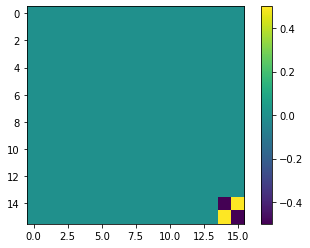

In [143]:
plt.imshow(sqrt.data.imag)
plt.colorbar()
plt.show()

In [144]:
matrix_equal(c3sqrtx, sqrt.data, ignore_phase=True)

True

In [155]:
ref = _compute_control_matrix(sqrt_x, 4)

In [156]:
gate = Operator(C3SqrtXGate().control())

In [157]:
matrix_equal(gate.data, ref, ignore_phase=True)

False

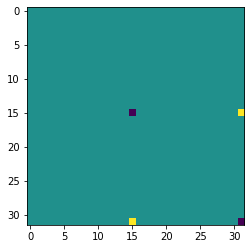

In [159]:
plt.imshow(ref.imag)

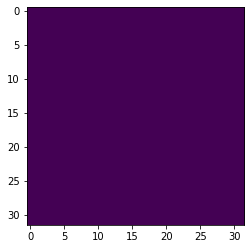

In [161]:
plt.imshow(np.round(gate.data.imag, decimals=3))

In [246]:
from qiskit.circuit.library import RealAmplitudes

In [247]:
real = RealAmplitudes(num_qubits=5)

In [248]:
real.draw()

┌──────────┐                              ┌──────────┐                 »
q_0: ┤ RY(θ[0]) ├──■────■─────────■─────────■──┤ RY(θ[5]) ├─────────────────»
     ├──────────┤┌─┴─┐  │         │         │  └──────────┘     ┌──────────┐»
q_1: ┤ RY(θ[1]) ├┤ X ├──┼────■────┼────■────┼────────────────■──┤ RY(θ[6]) ├»
     ├──────────┤└───┘┌─┴─┐┌─┴─┐  │    │    │                │  └──────────┘»
q_2: ┤ RY(θ[2]) ├─────┤ X ├┤ X ├──┼────┼────┼───────■────────┼───────■──────»
     ├──────────┤     └───┘└───┘┌─┴─┐┌─┴─┐  │     ┌─┴─┐      │       │      »
q_3: ┤ RY(θ[3]) ├───────────────┤ X ├┤ X ├──┼─────┤ X ├──────┼───────┼──────»
     ├──────────┤               └───┘└───┘┌─┴─┐   └───┘    ┌─┴─┐   ┌─┴─┐    »
q_4: ┤ RY(θ[4]) ├─────────────────────────┤ X ├────────────┤ X ├───┤ X ├────»
     └──────────┘                         └───┘            └───┘   └───┘    »
«                                                 ┌───────────┐     »
«q_0: ─────■───────────■─────────────■─────────■──┤ RY(θ[10]) ├─────»
«        ┌─┴─┐         │             │         │  └───────────┘     »
«q_1: ───┤ X ├─────────┼────────■────┼────■────┼─────────────────■──»
«     ┌──┴───┴───┐   ┌─┴─┐    ┌─┴─┐  │    │    │                 │  »
«q_2: ┤ RY(θ[7]) ├───┤ X ├────┤ X ├──┼────┼────┼────────■────────┼──»
«     └──────────┘┌──┴───┴───┐└───┘┌─┴─┐┌─┴─┐  │      ┌─┴─┐      │  »
«q_3: ─────■──────┤ RY(θ[8]) ├─────┤ X ├┤ X ├──┼──────┤ X ├──────┼──»
«        ┌─┴─┐    ├──────────┤     └───┘└───┘┌─┴─┐    └───┘    ┌─┴─┐»
«q_4: ───┤ X ├────┤ RY(θ[9]) ├───────────────┤ X ├─────────────┤ X ├»
«        └───┘    └──────────┘               └───┘             └───┘»
«                                                                ┌───────────┐»
«q_0: ───────────────────■────────────■─────────────■─────────■──┤ RY(θ[15]) ├»
«     ┌───────────┐    ┌─┴─┐          │             │         │  └───────────┘»
«q_1: ┤ RY(θ[11]) ├────┤ X ├──────────┼────────■────┼────■────┼───────────────»
«     └───────────┘┌───┴───┴───┐    ┌─┴─┐    ┌─┴─┐  │    │    │               »
«q_2: ──────■──────┤ RY(θ[12]) ├────┤ X ├────┤ X ├──┼────┼────┼────────■──────»
«           │      └───────────┘┌───┴───┴───┐└───┘┌─┴─┐┌─┴─┐  │      ┌─┴─┐    »
«q_3: ──────┼────────────■──────┤ RY(θ[13]) ├─────┤ X ├┤ X ├──┼──────┤ X ├────»
«         ┌─┴─┐        ┌─┴─┐    ├───────────┤     └───┘└───┘┌─┴─┐    └───┘    »
«q_4: ────┤ X ├────────┤ X ├────┤ RY(θ[14]) ├───────────────┤ X ├─────────────»
«         └───┘        └───┘    └───────────┘               └───┘             »
«                                                 
«q_0: ────────────────────────────────────────────
«          ┌───────────┐                          
«q_1: ──■──┤ RY(θ[16]) ├──────────────────────────
«       │  └───────────┘┌───────────┐             
«q_2: ──┼────────■──────┤ RY(θ[17]) ├─────────────
«       │        │      └───────────┘┌───────────┐
«q_3: ──┼────────┼────────────■──────┤ RY(θ[18]) ├
«     ┌─┴─┐    ┌─┴─┐        ┌─┴─┐    ├───────────┤
«q_4: ┤ X ├────┤ X ├────────┤ X ├────┤ RY(θ[19]) ├
«     └───┘    └───┘        └───┘    └───────────┘

In [251]:
from qiskit.circuit.library import GraphState
from qiskit.quantum_info import Operator

In [253]:
A = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]
print(GraphState(A).draw())
Operator(GraphState(A)).data

     ┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─┼─
     ├───┤ │ 
q_2: ┤ H ├─■─
     └───┘   


array([[ 0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
         0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
         0.35355339+0.j,  0.35355339+0.j],
       [ 0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j,
        -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
         0.35355339+0.j, -0.35355339+0.j],
       [ 0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
        -0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
        -0.35355339+0.j, -0.35355339+0.j],
       [ 0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,
         0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
        -0.35355339+0.j,  0.35355339+0.j],
       [ 0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
         0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,
        -0.35355339+0.j, -0.35355339+0.j],
       [-0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
         0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
         0.35355339+0.j, -0.35355339+0.j],
       [ 0.35355339+0.j,  0.353553

In [255]:
from qiskit.circuit import QuantumRegister
qr = QuantumRegister(5)
qr[:2]

[Qubit(QuantumRegister(5, 'q1'), 0), Qubit(QuantumRegister(5, 'q1'), 1)]

In [256]:
X

Matrix([
[0, 1],
[1, 0]])

In [257]:
X**0.5

Matrix([
[1/2 + 0.5*I, 1/2 - 0.5*I],
[1/2 - 0.5*I, 1/2 + 0.5*I]])

In [258]:
from qiskit.aqua.operators import *

In [273]:
x = [[1, 1], [1, -1]] / np.sqrt(2)

In [279]:
MatrixOp(x).to_pauli_op().to_legacy_op().paulis

[[(0.7071067811865475+0j), Pauli(z=[False], x=[True])],
 [(0.7071067811865475+0j), Pauli(z=[True], x=[False])]]

In [11]:
a = Z * RZ(theta) * H * RZ(-theta)
print(a)

Matrix([[sqrt(2)/2, sqrt(2)*exp(-1.0*I*θ)/2], [-sqrt(2)*exp(1.0*I*θ)/2, sqrt(2)/2]])


In [12]:
b = RZ(theta) * H * Z * RZ(-theta)
print(b)

Matrix([[sqrt(2)/2, -sqrt(2)*exp(-1.0*I*θ)/2], [sqrt(2)*exp(1.0*I*θ)/2, sqrt(2)/2]])


In [13]:
a + b

Matrix([
[sqrt(2),       0],
[      0, sqrt(2)]])

In [14]:
from qiskit.aqua.operators import X, Z, I

In [33]:
op = ((3*Z) ^ I ^ I) + (I ^ I ^ (2*X))

In [34]:
old_op = op.to_legacy_op()
print(old_op.paulis)

[[(3+0j), Pauli(z=[False, False, True], x=[False, False, False])], [(2+0j), Pauli(z=[False, False, False], x=[True, False, False])]]


In [28]:
from qiskit.quantum_info import Pauli
from qiskit.aqua.operators import WeightedPauliOperator

In [29]:
op = WeightedPauliOperator([[3, Pauli([1, 0, 0], [0, 0, 0])], [2, Pauli([0, 0, 0], [0, 0, 3])]])

In [30]:
op.paulis

[[(3+0j), Pauli(z=[True, False, False], x=[False, False, False])],
 [(2+0j), Pauli(z=[False, False, False], x=[False, False, True])]]

In [22]:
from qiskit import transpile, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import PiecewiseLinearPauliRotations

pwl = PiecewiseLinearPauliRotations(1, [0, 2], [0, 0], [2, 1])
qr = QuantumRegister(qc.num_qubits, 'q')
qc = QuantumCircuit(qr)
qc.compose(pwl, inplace=True)
transpiled = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=0)
print(transpiled.qasm())
sv = Statevector.from_label('0' * qc.num_qubits).evolve(transpiled)
print(sv)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
u3(2,0,0) q[1];
u3(0,0,0) q[1];
cx q[0],q[1];
u3(0,0,0) q[1];
cx q[0],q[1];
u3(-0.5,0,0) q[0];
cx q[1],q[0];
u3(0.5,0,0) q[0];
cx q[1],q[0];
u3(0,0,0) q[0];
cx q[1],q[0];
u3(0,0,0) q[0];
cx q[1],q[0];
u2(0,pi) q[0];
cx q[2],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
cx q[2],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
u2(0,pi) q[0];
u3(0,0,0) q[0];
u1(pi/4) q[2];
cx q[1],q[2];
u1(pi/4) q[1];
u1(-pi/4) q[2];
cx q[1],q[2];
cx q[1],q[0];
u3(0,0,0) q[0];
cx q[1],q[0];
u2(0,pi) q[0];
cx q[2],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
cx q[2],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
u2(0,pi) q[0];
u1(pi/4) q[2];
cx q[1],q[2];
u1(pi/4) q[1];
u1(-pi/4) q[2];
cx q[1],q[2];

Statevector([ 0.54030231-3.30839745e-17j,  0.        +3.30839745e-17j,
              0.73846026-1.11022302e-16j, -0.40342268+1.94289029e-16j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.0000000

In [16]:
qc.decompose().decompose().draw()

»
q22_0: ──────────────────────────────■─────────────────■────────────────────»
                                     │                 │                    »
q22_1: ──────────────────────────────┼─────────────────┼─────────────────■──»
        ┌───────────┐ ┌───────────┐┌─┴─┐┌───────────┐┌─┴─┐┌───────────┐┌─┴─┐»
q23_0: ─┤ R(2,pi/2) ├─┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├»
       ┌┴───────────┴┐└───┬───┬───┘├───┤└──┬─────┬──┘└───┘└───────────┘└───┘»
q24_0: ┤ U3(pi,0,pi) ├────┤ H ├────┤ X ├───┤ TDG ├──────────────────────────»
       ├─────────────┤    └───┘    └─┬─┘   └─────┘                          »
q24_1: ┤ U3(pi,0,pi) ├───────────────■──────────────────────────────────────»
       └─────────────┘                                                      »
«                                                                             »
«q22_0: ──────────────────────────────────────────────────────────────────────»
«                         ┌─────────────┐                                     »
«q22_1: ───────────────■──┤ U3(pi,0,pi) ├──■─────────────────────■─────────■──»
«       ┌───────────┐┌─┴─┐└─────────────┘  │                     │         │  »
«q23_0: ┤ U3(0,0,0) ├┤ X ├─────────────────┼─────────────────────┼─────────┼──»
«       └───────────┘└───┘               ┌─┴─┐┌───┐┌───┐┌─────┐┌─┴─┐┌───┐  │  »
«q24_0: ─────────────────────────────────┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├──┼──»
«                                        └───┘└───┘└─┬─┘└┬───┬┘└───┘└───┘┌─┴─┐»
«q24_1: ─────────────────────────────────────────────■───┤ T ├───────────┤ X ├»
«                                                        └───┘           └───┘»
«                                                                           »
«q22_0: ────────────────────────────────────────────────────────────────────»
«        ┌───┐      ┌─────────────┐┌──────────────┐┌───┐┌─────────────┐┌───┐»
«q22_1: ─┤ T ├───■──┤ U3(pi,0,pi) ├┤ U3(-0.5,0,0) ├┤ X ├┤ U3(0.5,0,0) ├┤ X ├»
«        └───┘   │  └─────────────┘└──────────────┘└─┬─┘└─────────────┘└─┬─┘»
«q23_0: ─────────┼───────────────────────────────────■───────────────────■──»
«        ┌───┐   │                                                          »
«q24_0: ─┤ H ├───┼──────────────────────────────────────────────────────────»
«       ┌┴───┴┐┌─┴─┐┌─────────────┐┌─────────────┐                          »
«q24_1: ┤ TDG ├┤ X ├┤ U3(pi,0,pi) ├┤ U3(pi,0,pi) ├──────────────────────────»
«       └─────┘└───┘└─────────────┘└─────────────┘                          »
«                                                                           »
«q22_0: ────────────────────────────────────────────────────────────────────»
«       ┌───────────┐┌───┐┌───────────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐»
«q22_1: ┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├»
«       └───────────┘└─┬─┘└───────────┘└─┬─┘└───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘»
«q23_0: ───────────────■─────────────────■─────────┼───────────■─────────┼──»
«                                                  │                     │  »
«q24_0: ───────────────────────────────────────────■─────────────────────■──»
«                                                                           »
«q24_1: ────────────────────────────────────────────────────────────────────»
«                                                                           »
«                                                                             »
«q22_0: ──────────────────────────────────────────────────────────────────────»
«       ┌─────┐┌───┐┌───┐ ┌───┐ ┌───────────┐┌───┐┌───────────┐┌───┐┌───┐┌───┐»
«q22_1: ┤ TDG ├┤ X ├┤ T ├─┤ H ├─┤ U3(0,0,0) ├┤ X ├┤ U3(0,0,0) ├┤ X ├┤ H ├┤ X ├»
«       └─────┘└─┬─┘└───┘ ├───┤ └───────────┘└─┬─┘└───────────┘└─┬─┘└───┘└─┬─┘»
«q23_0: ─────────■────■───┤ T ├───────■────────■─────────────────■─────────┼──»
«        ┌───┐      ┌─┴─┐┌┴───┴┐    ┌─┴─┐                                  │  »
«q24_0: ─┤ T ├──────┤ X ├┤ TDG ├────┤ X ├─────────────────────

In [115]:
p = 0.2
ops = X * RX(p) * H * RX(-p)
state = Matrix([[0, 1]])

In [116]:
2 * sympy.re(state * ops * state.T)

Matrix([[1.0*sqrt(2)]])

In [138]:
state = Matrix([[0], [1]])
state = simplify(RX(theta) * state)
state = simplify(RY(phi) * state)

In [137]:
simplify(sympy.conjugate(state).T * H * state)

Matrix([[-1.0*I*sin(θ/2 - conjugate(θ)/2)*cos(φ/2 + conjugate(φ)/2 + pi/4) - 1.0*sin(φ/2 + conjugate(φ)/2 + pi/4)*cos(θ/2 + conjugate(θ)/2)]])

In [154]:
theta, phi = 0.1, 0.2
state = Matrix([[0], [1]])
state = simplify(RX(theta) * state)
#state = simplify(Y * state)
state = simplify(RY(phi) * state)
state = simplify(H * state)
state = simplify(RY(-phi) * state)
state = simplify(RX(-theta) * state)
state = simplify(Matrix([[0, 1]]) * state)

In [155]:
simplify(state).evalf()

Matrix([[-0.829328165180247]])

In [ ]:
-sin(phi + pi/4)*cos(theta)

In [156]:
theta, phi = 0.8, 0.2
-np.cos(phi + np.pi/4) * np.cos(theta)

-0.38495225839084046

In [ ]:
d/dtheta sin(phi + pi/4)*sin(theta)